In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, SCORERS

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

#### Первичный осмотр и анализ полученных данных

In [3]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


Два признака (LifeSquare и Healthcare_1) имеют более 20% пропущенных данных

In [4]:
pd.options.display.max_columns = 25
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [5]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
df.groupby('Rooms')['Square', 'LifeSquare'].mean()

,Square,LifeSquare
Rooms,,
0.0,81.620358,90.558075
1.0,41.323277,25.159008
2.0,56.788214,35.971895
3.0,76.903234,54.942865
4.0,98.377544,65.667066
5.0,122.614941,89.445712
6.0,59.414334,38.702244
10.0,59.964120,37.321877
19.0,42.006046,21.779288


In [7]:
df['Ecology_2'].value_counts(normalize=True)

B    0.9903
A    0.0097
Name: Ecology_2, dtype: float64

In [8]:
df['Ecology_3'].value_counts(normalize=True)

B    0.9725
A    0.0275
Name: Ecology_3, dtype: float64

In [9]:
df['Shops_2'].value_counts(normalize=True)

B    0.9175
A    0.0825
Name: Shops_2, dtype: float64

Данные 3-х признаков нуждаются в приведении к типу int. Необходимо скорректировать число комнат, проверить и скорректировать этажность и год постройки дома.

#### Функции для очистки данных

In [10]:
def square(df):
    # Исправляем сомнительную площадь
    df.loc[(df['Square'] < 20) & (df['Square'] < df['LifeSquare']), 'Square'] = df['LifeSquare']
    # Удаляем выбросы
    df = df.loc[df['Square'] < 300, :]
    return df

In [11]:
def rooms(df):
    # Корректируем кол-во комнат со зачением 0 и > 5, исходя из площади
    df.loc[df['Rooms'] > 5, 'Rooms'] = 0
    df.loc[(df['Square'] > 111) & (df['Rooms'] == 0), 'Rooms'] = 5
    df.loc[(df['Square'] > 88) & (df['Rooms'] == 0), 'Rooms'] = 4
    df.loc[(df['Square'] > 66) & (df['Rooms'] == 0), 'Rooms'] = 3
    df.loc[(df['Square'] > 48) & (df['Rooms'] == 0), 'Rooms'] = 2
    df.loc[df['Rooms'] == 0, 'Rooms'] = 1
    return df

In [12]:
def house_floor(df):
    # Нулевую этажность дома заменяем этажом квартиры
    # Этаж квартиры больше этажности дома заменяем этажом дома или наоборот
    df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df[df['HouseFloor'] == 0].Floor
    df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor'] = df['Floor']
    return df

In [13]:
def house_year(df):
    # Допускаю, что года 2019 и 2020 - квартиры в домах, планируемых к сдаче.
    # Некорректные даты корректируем.
    df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 1968
    df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = 2008
    return df

In [14]:
def to_int(df):
    # Приведение признаков к int
    df['Ecology_2'] = (df['Ecology_2'] == 'A').astype(int)
    df['Ecology_3'] = (df['Ecology_3'] == 'A').astype(int)
    df['Shops_2'] = (df['Shops_2'] == 'A').astype(int)
    return df

In [15]:
def prepare(df):
    # df = square(df)
    df = rooms(df)
    df = house_floor(df)
    df = house_year(df)
    df = to_int(df)
    return df

In [16]:
# Вызов общей функции для преобразования данных
df = prepare(df)

#### Визуализация данных для анализа признаков и оценки их корреляции

In [17]:
features = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1',
            'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2']

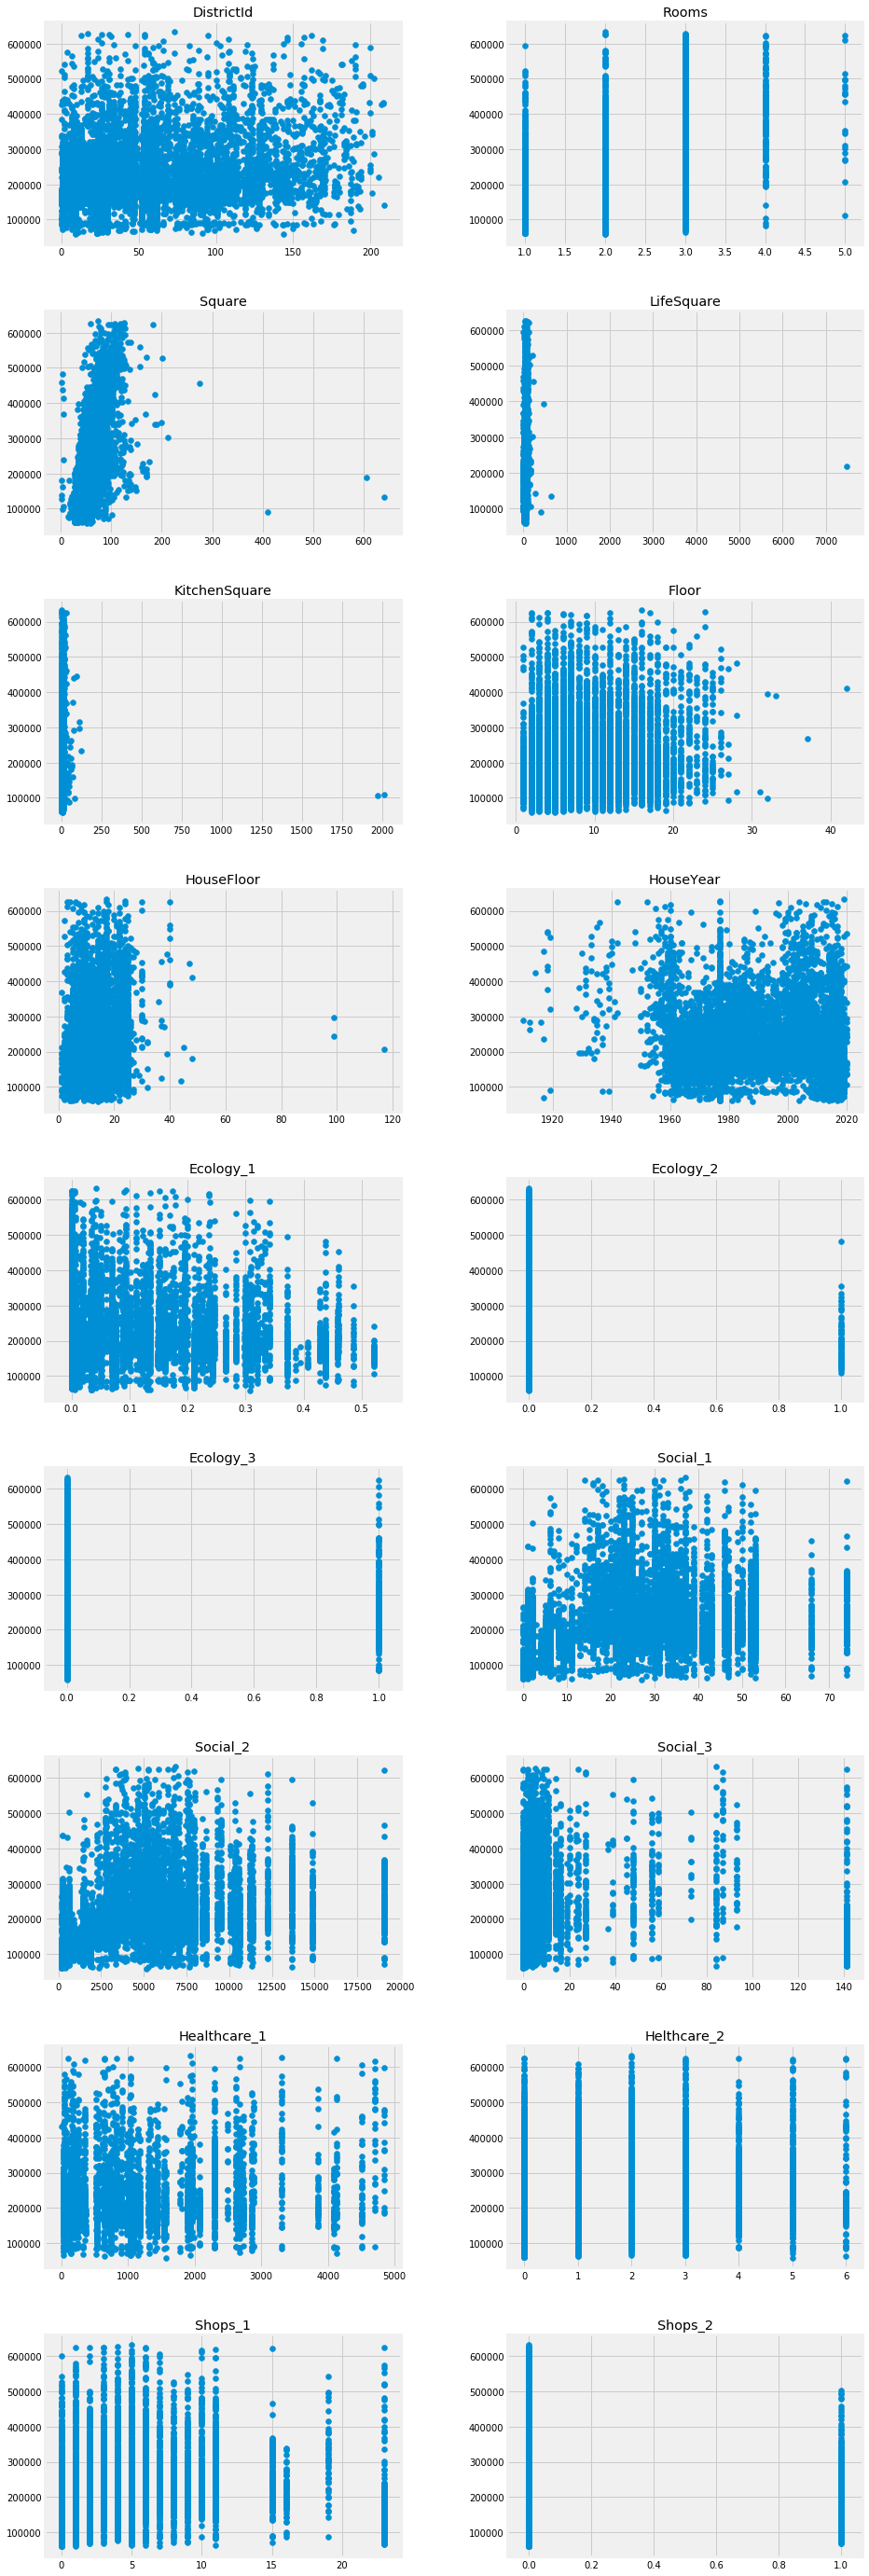

In [18]:
fig, ax = plt.subplots(nrows=9, ncols=2)
ax = ax.flatten()

for i, j in enumerate(features):
    ax[i].scatter(df[j], df['Price'])
    ax[i].set_title(j)

fig.set_size_inches(14, 50)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

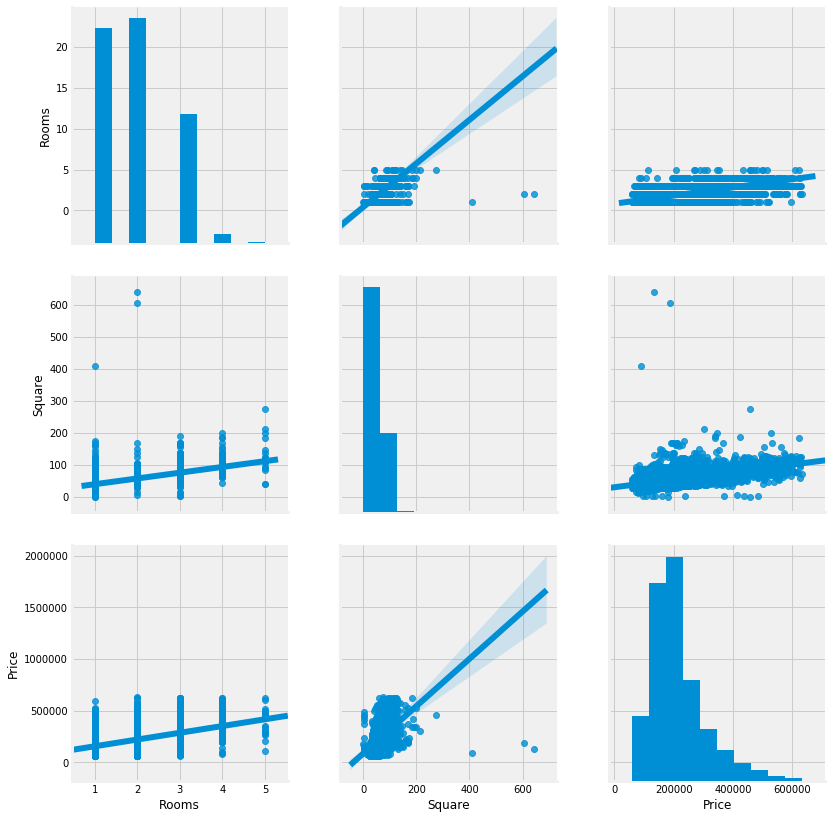

In [19]:
sns.pairplot(df.loc[:, ['Rooms', 'Square', 'Price']], kind='reg').fig.set_size_inches(12,12)

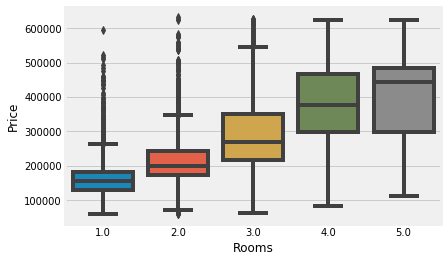

In [20]:
sns.boxplot(df['Rooms'], df['Price'])

#### Кросс-валидация

In [21]:
features = ['DistrictId', 'Square', 'Floor', 'HouseFloor', 'HouseYear',
            'Ecology_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1']

# sorted(SCORERS.keys())

In [22]:
parameters = [{'n_estimators': (100, 200, 300, 400),
               'max_depth': (15, 25)}]

grid = GridSearchCV(estimator=RandomForestRegressor(max_features=4,
                                                    min_samples_leaf=1,
                                                    min_samples_split=5,
                                                    min_impurity_decrease=0.1,
                                                    random_state=143),
                    param_grid=parameters,
                    scoring='r2',
                    n_jobs=-1,
                    cv=5)

In [23]:
grid.fit(df.loc[:, features], df['Price'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.1,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators='warn', n_jobs=None, oob_score=False,
           random_state=143, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': (100, 200, 300, 400), 'max_depth': (15, 25)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [24]:
grid.best_params_

{'max_depth': 25, 'n_estimators': 300}

#### Построение модели и ее оценка

In [25]:
# Разделение датафрейма на тренировочный и валидационный наборы данных
train, valid = train_test_split(df, test_size=0.25, random_state=344)
train.shape, valid.shape

((7500, 20), (2500, 20))

In [26]:
# Создание модели
model = RandomForestRegressor(n_estimators=300,
                              max_depth=24,
                              max_features=4,
                              min_samples_leaf=1,
                              min_samples_split=5,
                              min_impurity_decrease=0.1,
                              random_state=143,
                              n_jobs=-1)

In [27]:
# Обучение модели
model.fit(train.loc[:, features], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=24,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.1,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=-1, oob_score=False, random_state=143,
           verbose=0, warm_start=False)

In [28]:
# Оценка важности признаков
pd.DataFrame({'Важность': model.feature_importances_},
             index=features).nlargest(len(features), 'Важность')

,Важность
Square,0.452413
Social_2,0.127862
Social_3,0.092082
DistrictId,0.068643
HouseYear,0.059991
Ecology_1,0.053626
HouseFloor,0.046704
Floor,0.035569
Shops_1,0.034853
Helthcare_2,0.028256


In [29]:
# Предсказание для трейна
predict_train = model.predict(train.loc[:, features])

In [30]:
# Предсказание для валида
predict_valid = model.predict(valid.loc[:, features])

In [31]:
# К-т детерминации предсказания для трейна
r2_score(train['Price'], predict_train)

0.9324924582858762

In [32]:
# К-т детерминации предсказания для валида
r2_score(valid['Price'], predict_valid)

0.7911630211290102

#### Итоговое обучение модели

In [33]:
# Обучение модели на полном датафрейме train.csv
model.fit(df.loc[:, features], df['Price'])
r2_score(df['Price'], model.predict(df.loc[:, features]))

0.9366949202968866

#### Предсказание цен для квартир из файла test.csv

In [34]:
test = pd.read_csv('test.csv')
test = prepare(test)

(-839.9043901660281, 17637.904390166026, 30471.834928119795, 661936.4096694088)

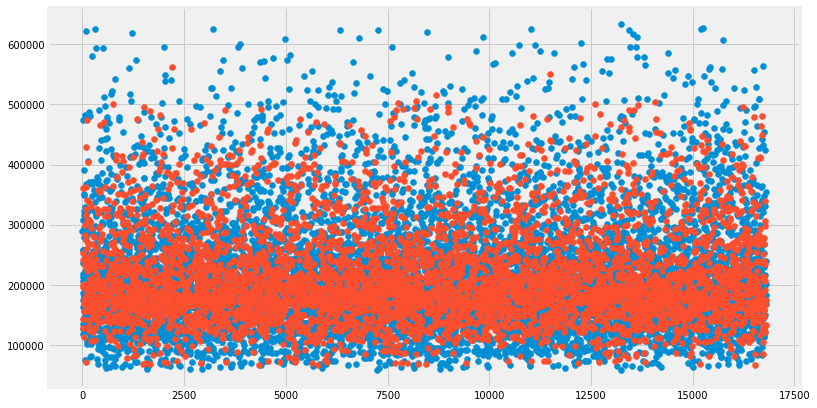

In [35]:
# График оптимальной модели на основе GridSearch-а
plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(df.loc[:, 'Id'], df['Price'])
lim = plt.axis()
y_test = grid.best_estimator_.fit(df.loc[:, features], df['Price']).predict(test.loc[:, features])
plt.scatter(test.loc[:, 'Id'], y_test)
plt.axis(lim)

In [36]:
test['Price'] = model.predict(test.loc[:, features])
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.908000,56.449500,36.158810,5.976800,8.632000,13.395000,1984.392600,0.119874,0.009600,0.029800,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,0.082400,215318.574975
std,4832.674037,44.179466,0.808991,19.092787,17.825287,9.950018,5.483228,6.231945,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,0.275001,78314.260624
min,1.000000,0.000000,1.000000,1.378543,0.333490,0.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,67188.580259
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,0.000000,0.000000,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,0.000000,164458.754856
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,14.000000,1977.000000,0.072158,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,0.000000,196277.378864
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,0.000000,0.000000,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,0.000000,249508.530554
max,16795.000000,212.000000,5.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,566661.327419


In [37]:
test.loc[:, ['Id', 'Price']].to_csv('SKovrigin_predictions.csv', index=None)

#### Проверка полноты и корректности полученных данных

In [38]:
test = pd.read_csv('SKovrigin_predictions.csv')

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
Id       5000 non-null int64
Price    5000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 78.2 KB


In [40]:
test[test['Price'] > 0].shape

(5000, 2)

Время работы: ~ 2 минуты.